# Chapter 

Course repo: https://github.com/mikexcohen/LinAlg4DataScience/tree/main

In [62]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

np.set_printoptions(suppress=True, precision=4)

## Ex. 1 
Write a Python function that takes two vectors as input and provides two numbers as
output: the Pearson correlation coefficient and the cosine similarity value. Write code
that follows the formulas presented in this chapter; don’t simply call np.corrcoef and
spatial.distance.cosine. Check that the two output values are identical when the
variables are already mean centered and different when the variables are not mean
centered

In [2]:
# Create 2 vectors
x = np.array([5, 7, 15])
y = np.array([1, 10, 3 ])


In [3]:
def corrAndCos(x, y):
    # Compute Pearson correlation 
    # Remember that pearson corr can be thought as the dot product of the unit versions 2 mean centered vectors

    # Compute means
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Normalize vectors 
    x_norm = x - x_mean
    y_norm = y - y_mean

    # Compute unit vector for x 
    u_x = x_norm / np.linalg.norm(x_norm)

    # Compute unit vecctor for vector y 
    u_y = y_norm / np.linalg.norm(y_norm)

    # Compute dot product 

    x_dot_y = np.dot(u_x, u_y)

    # --------------------------------------------------------------------------------------------------------------
    # Cosine similarity 
    # Remember x dot y = |x||y|Cos(A)

    # Solving for Cos(A) feeding the normalized vectors 
    cos_A = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

    return x_dot_y, cos_A

In [4]:
print(corrAndCos(x, y))

(np.float64(-0.11996801279431377), np.float64(0.661681982918304))


## Ex 2
 Let’s continue exploring the difference between correlation and cosine similarity.
 Create a variable containing the integers 0 through 3, and a second variable equaling
 the first variable plus some offset. You will then create a simulation in which you
 systematically vary that offset between −50 and +50 (that is, the first iteration of the
 simulation will have the second variable equal to [−50, −49, −48, −47]). In a for
 loop, compute the correlation and cosine similarity between the two variables and
 store these results. Then make a line plot showing how the correlation and cosine
 similarity are affected by the mean offset. You should be able to reproduce Figure 4-4.

In [5]:
# create the variables
a = np.array([0, 1, 2, 3])
offsets = np.arange(-50,51)

# Define a vector to store the results 
results = np.zeros((len(offsets), 2))

for i in range(len(offsets)): 
    # Create second vector with offset 
    b = a + offsets[i]

    # Store the results
    results[i, :] = corrAndCos(a, b)

results[:10, :]

array([[ 1.        , -0.78779808],
       [ 1.        , -0.78749923],
       [ 1.        , -0.78718734],
       [ 1.        , -0.78686153],
       [ 1.        , -0.78652085],
       [ 1.        , -0.78616426],
       [ 1.        , -0.78579062],
       [ 1.        , -0.78539868],
       [ 1.        , -0.78498706],
       [ 1.        , -0.78455425]])

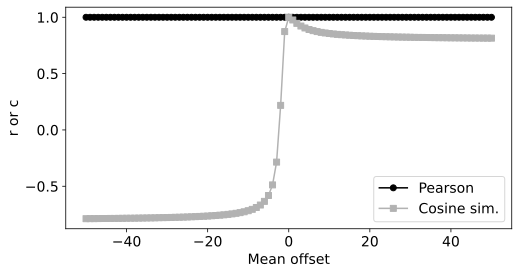

In [6]:
# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.savefig('Figure_04_02.png',dpi=300) # write out the fig to a file
plt.show()

## Ex 3
 There are several Python functions to compute the Pearson correlation coefficient.
 One of them is called pearsonr and is located in the stats module of the SciPy
 library. Open the source code for this file (hint: ??functionname) and make sure you
 understand how the Python implementation maps onto the formulas introduced in
 this chapter

In [7]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None, axis=0)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None, axis=0):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability 

## Ex 4

 Your goal in this exercise is to determine whether your own bare-bones correla
tion function is faster than NumPy’s corrcoef function. Modify the function from
 Exercise 4-2 to compute only the correlation coefficient. Then, in a for loop over
 1,000 iterations, generate two variables of 500 random numbers and compute the
 correlation between them. Time the for loop. Then repeat but using np.corrcoef.
 In my tests, the custom function was about 33% faster than np.corrcoef. In these
 toy examples, the differences are measured in milliseconds, but if you are running
 billions of correlations with large datasets, those milliseconds really add up! (Note
 that writing your own functions without input checks has the risk of input errors that
 would be caught by np.corrcoef.) (Also note that the speed advantage breaks down
 for larger vectors. Try it!)

In [8]:
def corr_coef(x, y):
    # Compute Pearson correlation 
    # Remember that pearson corr can be thought as the dot product of the unit versions 2 mean centered vectors

    # Compute means
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Normalize vectors 
    x_norm = x - x_mean
    y_norm = y - y_mean

    # Compute unit vector for x 
    u_x = x_norm / np.linalg.norm(x_norm)

    # Compute unit vecctor for vector y 
    u_y = y_norm / np.linalg.norm(y_norm)

    # Compute dot product 

    x_dot_y = np.dot(u_x, u_y)

    return x_dot_y

In [9]:
# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
  a = np.random.rand((500))
  b = np.random.rand((500))
  corr_coef(a, b)
t1 = time.time() - tic

In [10]:
# clock my custom-written function
tic = time.time()
for i in range(numIters):
  a = np.random.rand((500))
  b = np.random.rand((500))
  np.corrcoef(a, b)
t2 = time.time() - tic

In [11]:
# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   corrcoef took {t2*1000:.2f} ms')

print(f'My function is {(t2 - t1)*100/t2: .2f}% faster')

My function took 17.34 ms
   corrcoef took 55.55 ms
My function is  68.78% faster


## Ex. 5

Let’s build an edge detector. The kernel for an edge detector is very simple: [−1 +1].
The dot product of that kernel with a snippet of a time series signal with constant
value (e.g., [10 10]) is 0. But that dot product is large when the signal has a steep
change (e.g., [1 10] would produce a dot product of 9). The signal we’ll work with is
a plateau function. Graphs A and B in Figure 4-5 show the kernel and the signal. The
first step in this exercise is to write code that creates these two time series

In [12]:
# create the kernel (in the book figure I used +1.5)
kernel = np.array([-1, 1])
kernel = np.array([0, -1, 1, 0])
kernel = np.array([1, -1])
kernel = np.array([-1, 2])
plt

kernel

array([-1,  2])

In [13]:
# and the "signal" (a plateau)
signal = np.zeros(30)
signal[10:20] = 1

signal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Text(0.5, 1.0, 'Time series signal')

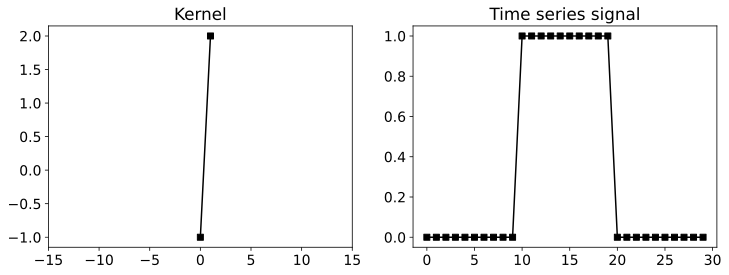

In [14]:
# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')


 Next, write a for loop over the time points in the signal. At each time point, compute
 the dot product between the kernel and a segment of the time series data that has
 the same length as the kernel. You should produce a plot that looks like graph C in
 Figure 4-5. (Focus more on the result than on the aesthetics.) Notice that our edge
 detector returned 0 when the signal was flat, +1 when the signal jumped up, and −1
 when the signal jumped down.

In [15]:
# Define array to store results
results = np.zeros(len(signal) - 1)
for i in range(len(signal) - (len(kernel))):
    # Compute dot product of the kernel with the data segment
    segment_end = i+len(kernel)
    segment = signal[i: segment_end]
    dot_prod = np.dot(kernel, segment)

    # Store result
    results[i] = dot_prod

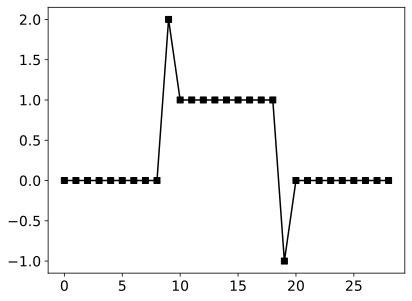

In [16]:
plt.plot(results, 'ks-')

plt.show()

## Ex 6
 Now we will repeat the same procedure but with a different signal and kernel. The
 goal will be to smooth a rugged time series. The time series will be 100 random
 numbers generated from a Gaussian distribution (also called a normal distribution).
 The kernel will be a bell-shaped function that approximates a Gaussian function,
 defined as the numbers [0, .1, .3, .8, 1, .8, .3, .1, 0] but scaled so that the sum over
 the kernel is 1. Your kernel should match graph A in Figure 4-6, although your signal
 won’t look exactly like graph B due to random numbers.
 
 Copy and adapt the code from the previous exercise to compute the sliding time ser
ies of dot products—the signal filtered by the Gaussian kernel. Warning: be mindful
 of the indexing in the for loop. Graph C in Figure 4-6 shows an example result. You
 can see that the filtered signal is a smoothed version of the original signal. This is also
 called low-pass filtering

In [52]:
# Generate random data from normal dist 
rng = np.random.default_rng(seed=0)
signal = rng.normal(0, 1, 100)

# Define Kernel 
kernel = np.array([0, 0.1, 0.3, 0.8, 1, 0.8, 0.3, 0.1, 0])

# Scale kernel to make ir sum 1 (get pct for each element)
kernel = kernel / np.sum(kernel)

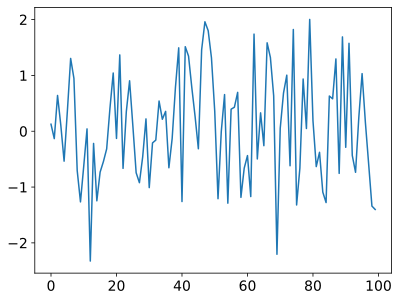

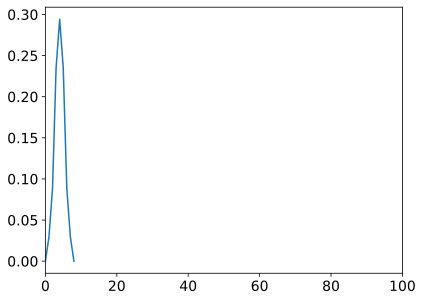

In [53]:
plt.plot(signal)
plt.show()

plt.plot(kernel)
plt.xlim((0, 100))
plt.show()

In [54]:
# Define array to store results
results = np.zeros(len(signal) - 1)
for i in range(len(signal) - (len(kernel))):
    # Compute dot product of the kernel with the data segment
    segment_end = i+len(kernel)
    segment = signal[i: segment_end]
    dot_prod = np.dot(kernel, segment)

    # Store result
    results[i] = dot_prod

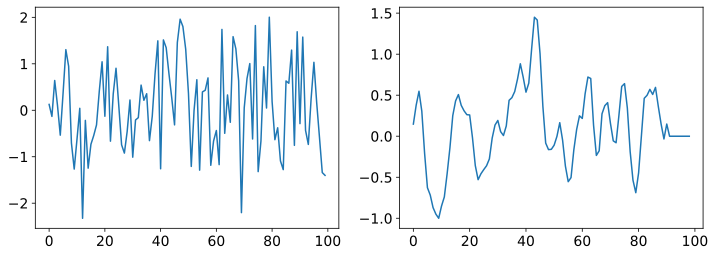

In [55]:
# Plot
_, ax = plt.subplots(1, 2, figsize=(12,4))

# Plot original data
ax[0].plot(signal)

ax[1].plot(results)

## Ex 8

One way to determine an optimal k is to repeat the clustering multiple times (each
 time using randomly initialized cluster centroids) and assess whether the final clus
tering is the same or different. Without generating new data, rerun the k-means code
 several times using k = 3 to see whether the resulting clusters are similar (this is a
 qualitative assessment based on visual inspection). Do the final cluster assignments
 generally seem similar even though the centroids are randomly selected

In [128]:
# Let's build our K means as a function 

# k-means algorythm
def k_means(data, k, max_iter, random_seed):
    # Select k random values between 0 and(lenght of our data) This will produce for example array([10, 52, 86]) that we will pick as our centroids 
    rng = np.random.default_rng(seed=random_seed)
    ridx = rng.choice(len(data), k, replace=False)

    # _____________________________________________________________________________________________________________________________________________________

    # Define centroids as the elements picked at random by ridx (random index)
    centroids = data[ridx]

    # _____________________________________________________________________________________________________________________________________________________ 

    # Model 
    for iter in range(max_iter):
        # Breaking condition
        prev_centroids = centroids.copy()

        # Compute euclidian distance of each data point with each centroid 
        distances = np.zeros((len(data), k))

        # Loop through each centroid
        for i in range(k):
            # Array of difference vectors wrt to centroid i
            diff_vectors = data - centroids[i]

            # Compute the square of the magnitude by adding up the components of the diff vectors
            dist_sq_i = np.sum(diff_vectors**2, axis=1)

            # Store in final distances 
            distances[:, i] = dist_sq_i

        # For each data point check the min distance 
        labels = np.argmin(distances, axis=1)

        # Update each centroid to the avg of the elements assigned to its class 
        for i in range(k):
            # Create a True/False for the labels vector wrt to the current class
            class_mask = labels == i
            # Filter data to only the current class data
            points_in_cluster = data[class_mask]
            if len(points_in_cluster) > 0:  # Prevent division by zero
                # Calculate new centroid by taking the average of the data contained within that class
                new_centroid_i = np.mean(points_in_cluster, axis=0)
                # Update the class centroid 
                centroids[i, :] = new_centroid_i

        # Define break condition if clusters are not changing anymore
        if np.allclose(prev_centroids, centroids):
            print(f"Converged at iteration {iter}")
            break

    # Return final labels
    return labels, centroids
       

Converged at iteration 3


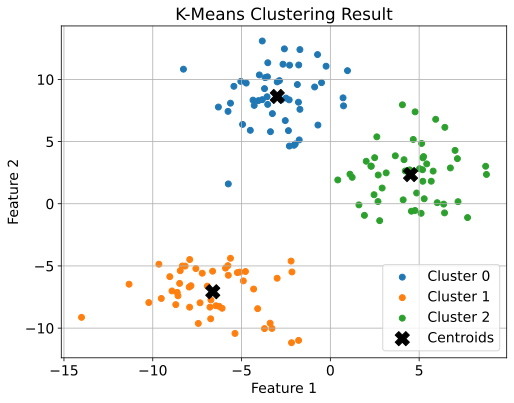

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Generate synthetic data (2D for visualization)
data, true_labels = make_blobs(n_samples=150, centers=3, cluster_std=2.2, random_state=42)

# 2. Call your k-means function
k = 3
labels, centroids = k_means(data, k=k, max_iter=100, random_seed=5)

# 3. Plot the clusters
plt.figure(figsize=(8, 6))

# Plot data points, color-coded by cluster
for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


Converged at iteration 3


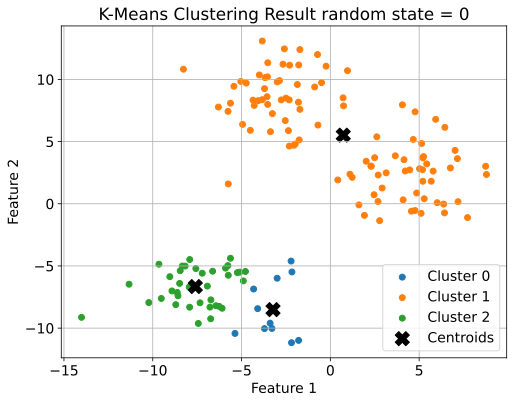

Converged at iteration 6


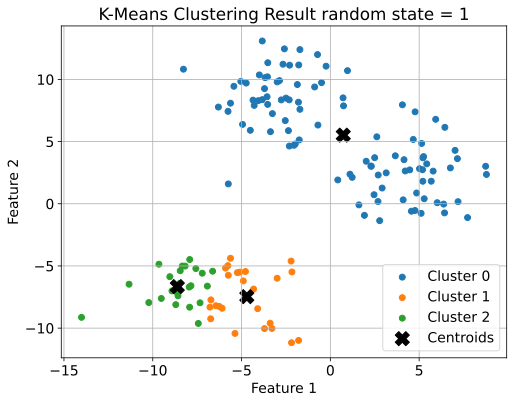

Converged at iteration 4


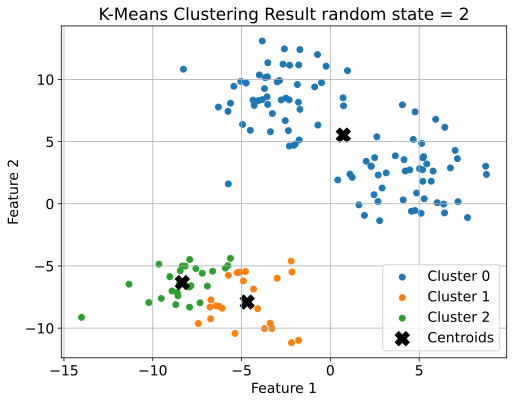

Converged at iteration 2


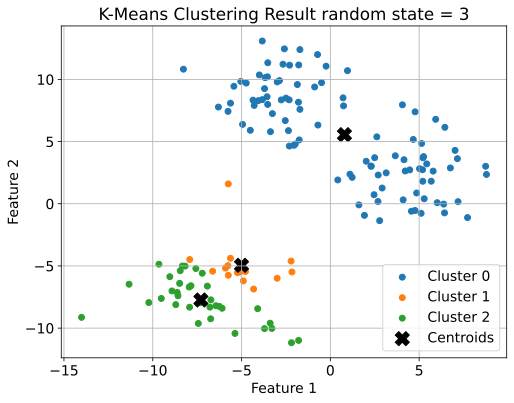

Converged at iteration 3


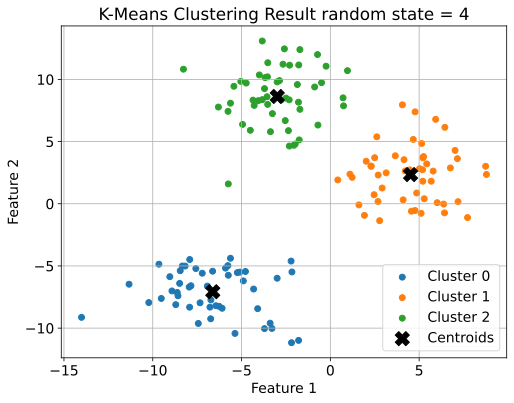

Converged at iteration 3


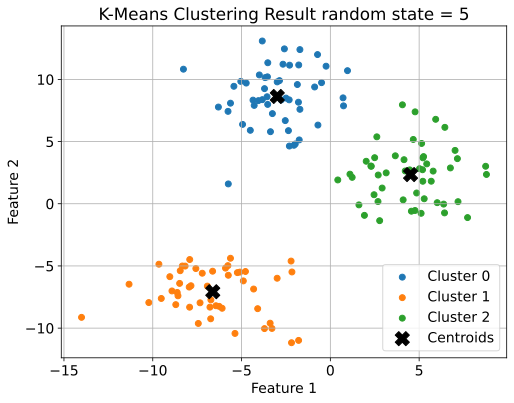

In [150]:
# Result can change depending on the initial location of the centroids 

for random_state in range(6):
    # 2. Call your k-means function
    k = 3
    labels, centroids = k_means(data, k=k, max_iter=100, random_seed=random_state)

    # 3. Plot the clusters
    plt.figure(figsize=(8, 6))

    # Plot data points, color-coded by cluster
    for i in range(k):
        cluster_points = data[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering Result random state = {random_state}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()
